In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fft import fft, ifft



from numpy import ma
from matplotlib import ticker, cm

# Параметры пучка
wavelength = 780e-9
E0 = 1
c = 3e+8
dt = 7.5e-15
dx = 10 * wavelength

omega0 = 2 * np.pi * c / wavelength
dots = 2 ** 10
f = omega0 / (2 * np.pi)

t_ = np.linspace(-40e-15, 40e-15, dots)
x_ = np.linspace(-100 * dx, 100 * dx, dots)

w_ = np.linspace(-20 * omega0, 20 * omega0, dots)
DX = x_[1] - x_[2]
T, X = np.meshgrid(t_, x_, sparse=True)
E_x = E0 * np.exp(-2 * (X / dx) ** 2) * np.exp(-2 * (T / dt) ** 2) * np.sin(omega0 * T/100)


E_x_spec_x = np.fft.fftshift(np.fft.fft(E_x, axis=1), axes=1)
E_x_spec_t = np.fft.fftshift(np.fft.fft(E_x, axis=0), axes=0)


F = 12.75e-3



def k():
    kx = 2 * np.pi * np.fft.fftfreq(dots, DX)/c
    kx = np.fft.fftshift(np.fft.fftfreq(dots))/(x_[1]-x_[2]) #* 2 * np.pi
    # kx, kx = np.meshgrid(kx, kx)
    k_ = np.fft.fftshift(np.fft.fftfreq(n=8024))/(t_[1]-t_[2]) # * n_w(w_)
    kz = np.sqrt(k_ ** 2 - kx ** 2)


    return kx, kz, k_

def linza(x, k_):
    return np.exp(-(1j * k_ / (2 * F)) * x ** 2)

kx, kz, k_ = k()

kv, xv = np.meshgrid(k_, x_)

E_x_lens = E_x_spec_t * linza(xv, kv)
E_x_lens = np.fft.fftshift(np.fft.ifft(E_x_lens, axis = 1), axes = 1)


def C_():
    return np.fft.fftshift(np.fft.fft2(E_x_lens))

def g_x(z):
    kx, kz, k_ = k()
    g = C_() * np.exp(-1j * kz * z)
    return np.fft.ifft2(np.fft.fftshift(g))

def g_z(z):
    kx, kz, k_ = k()
    g = (kx * C_() * np.fft.fftshift(np.exp(-1j * kz * z))/kz)
    return np.fft.ifft2(g)

# def angular(z):
#     fft_c = np.fft.fft2(np.fft.fft2(E_x_lens) * np.exp(1j * k_/(2*z) *(X**2)))
#     c = np.fft.ifft2(fft_c)
#     return c

fig, axes = plt.subplots(2, 2, figsize=(8,8))
ax = axes[0,0]
ax.pcolormesh(abs(E_x_spec_x), cmap='inferno')
ax = axes[1,0]
ax.pcolormesh(abs(E_x_spec_t), cmap='inferno')
ax = axes[0,1]
ax.set_ylim([500, 520])
ax.pcolormesh(abs(E_x), cmap='inferno')
ax = axes[1,1]
ax.pcolormesh(abs(E_x_lens), cmap='inferno')
plt.show()

fig, axes = plt.subplots(3, 2, figsize=(8,8))

ax = axes[0,0]
ax.pcolormesh(abs(g_z(0)), cmap='inferno')
ax = axes[1,0]
ax.pcolormesh(abs(g_z(F/2)), cmap='inferno')
ax = axes[2,0]
ax.pcolormesh(abs(g_z(F)), cmap='inferno')

ax = axes[0,1]
ax.pcolormesh(abs(g_x(0)), cmap='inferno')
ax = axes[1,1]
ax.pcolormesh(abs(g_x(F/2)), cmap='inferno')
ax = axes[2,1]
ax.pcolormesh(abs(g_x(F)), cmap='inferno')
plt.show()

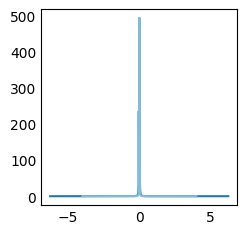

In [ ]:
x = np.linspace(-4,4, 1024)
y = np.cos(x)*np.cos(1.2*x)
z = abs(np.fft.fftshift(np.fft.fft(y)))
zx = np.fft.fftshift(np.fft.fftfreq(len(x), 2* x.max()/dots))
plt.plot(zx,z)
plt.plot(zx,z)

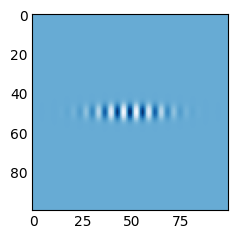

In [ ]:
E_x = E0 * np.exp(-2 * (X/dx)**2) * np.exp(-2*(T/dt)**2) * np.cos(omega0 * T)
# plt.contourf(abs(np.fft.fftshift(np.fft.fft2(E_x))))
plt.imshow(E_x)
plt.show()
# x = t / y = x

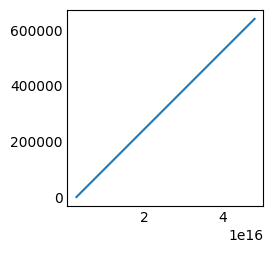

In [ ]:

def n_k(w):
    return 1.45 + 2.74e-42 * c * w ** 2 - 3.94e+19  / w ** 2

def k():
    kx = KX
    k = w_/c#*n_k(w_)
    kz = np.sqrt(k ** 2 - kx ** 2 )
    return kx, kz 

kx, kz = k()

plt.plot(w_,kx)
plt.show()

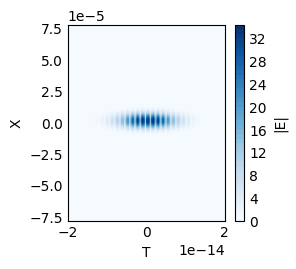

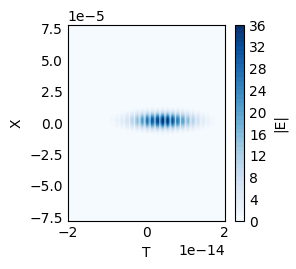

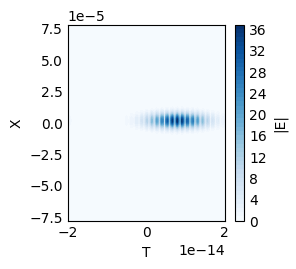

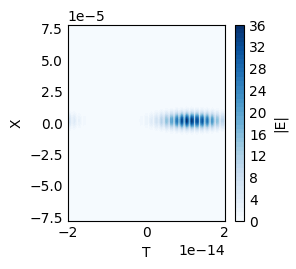

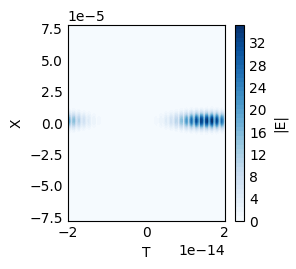

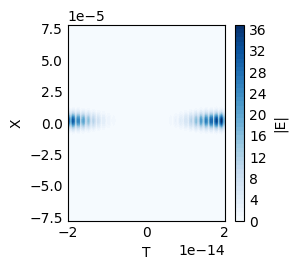

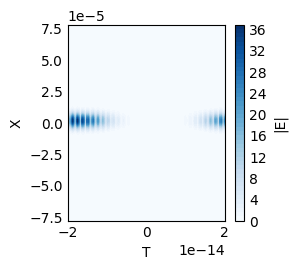

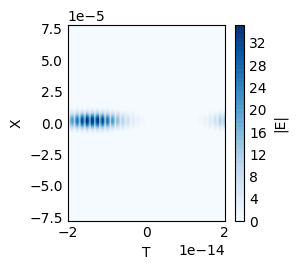

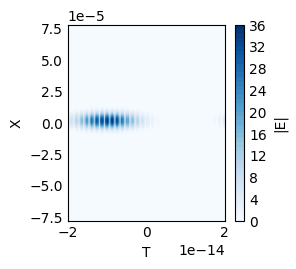

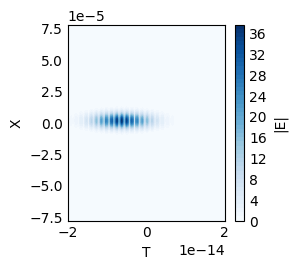

In [ ]:


def C_():
    return np.fft.fftshift(np.fft.fft2(E_x))

def g_x(z):
    kx, kz = k()
    g = C_() * np.exp(-1j * kz * z)
    return np.fft.fft2(g)

def g_z(z):
    kx, kz = k()
    g = (kx * C_() * np.exp(-1j * kz * z))/kz
    return np.fft.fft2(g)





for i in range(10):
    plt.contourf(t_,x_,abs(g_z(z*i)), levels=50)
    # plt.contourf(t_,x_,abs(C_()), levels=50)
    plt.colorbar(label='|E|')
    plt.xlabel('T')
    plt.ylabel('X')
    plt.show()
# plt.text(0.1, 0.1, 'text here', transform=ax.transAxes,bbox=dict(facecolor='white', edgecolor='black'), size=12)
# plt.text(0.05, 0.81, "hello",
#        bbox=dict(facecolor='white', edgecolor='black'), size=12)


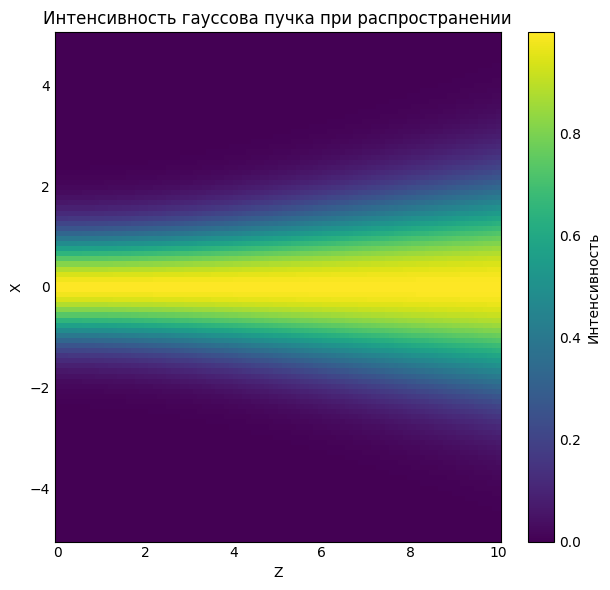

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_beam(x, z, t, w0=1.0, lambda_=0.5, E0=1.0):
    k = 2 * np.pi / lambda_
    w_z = w0 * np.sqrt(1 + (z / (np.pi * w0**2 / lambda_))**2)
    E = E0 * np.exp(-x**2 / w_z**2) * np.exp(1j * (k * z - 2 * np.pi * lambda_ * t))
    return np.abs(E)

# Параметры пучка и распространения
wavelength = 0.5  # длина волны
w0 = 1.0           # начальный радиус пучка
z_values = np.linspace(0, 10, 100)  # значения z
x_values = np.linspace(-5, 5, 100)  # значения x

# Создание массива для сохранения значений интенсивности
intensity_values = np.zeros((len(z_values), len(x_values)))

# Расчет интенсивности на каждом расстоянии z и положении x
for i, z in enumerate(z_values):
    for j, x in enumerate(x_values):
        intensity_values[i, j] = gaussian_beam(x, z, 0, w0, wavelength)

# Визуализация результатов
plt.figure(figsize=(12, 6))

# Поверхность для интенсивности
plt.subplot(1, 2, 1)
Z, X = np.meshgrid(z_values, x_values)
plt.pcolormesh(Z, X, intensity_values.T, shading='auto', cmap='viridis')
plt.colorbar(label='Интенсивность')
plt.title('Интенсивность гауссова пучка при распространении')
plt.xlabel('Z')
plt.ylabel('X')

# plt.subplot(1, 2, 2)
# target_z = 2
# closest_z_index = np.argmin(np.abs(z_values - target_z))
# plt.plot(x_values, intensity_values[closest_z_index, :], label=f'z ≈ {z_values[closest_z_index]}')
# plt.title('Срез гауссова пучка при разных значениях Z')
# plt.xlabel('X')
# plt.ylabel('Интенсивность')
# plt.legend()

plt.tight_layout()
plt.show()


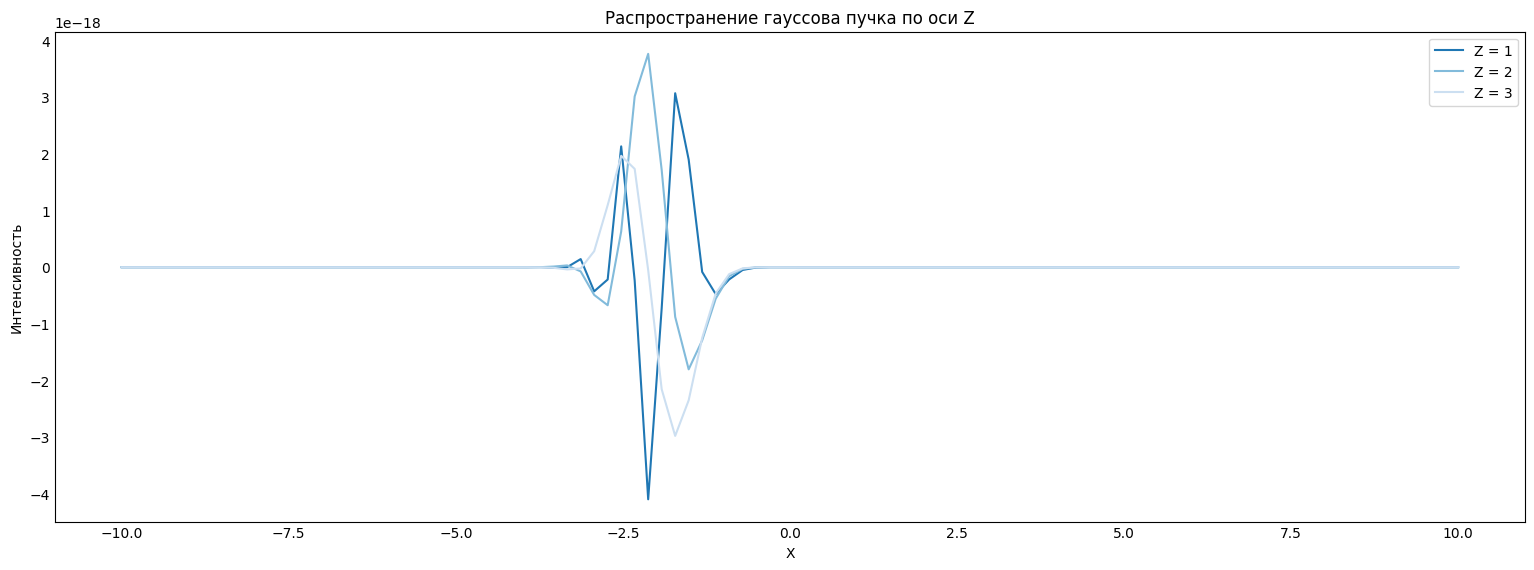

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_beam(X, T, Z, dx=1.0, dt=1.0, omega0=1.0):
    return np.exp(-2 * (X / dx)**2) * np.exp(-2 * (T / dt)**2) * np.cos(omega0 * T - (np.pi * X**2) / (2 * omega0 * Z))

# Параметры пучка и распространения
dx = 1.0       # пространственное разрешение
dt = 1.0       # временное разрешение
omega0 = 1.0   # частота

X = np.linspace(-10, 10, 100)  # значения X
T = np.linspace(0, 10, 100)    # значения T
Z_values = [1, 2, 3]           # значения Z

# Визуализация пучка в разные моменты оси Z
plt.figure(figsize=(15, 5))

for Z in Z_values:
    beam_profile = gaussian_beam(X, T, Z, dx, dt, omega0)
    
    plt.plot(X, beam_profile, label=f'Z = {Z}')

plt.title('Распространение гауссова пучка по оси Z')
plt.xlabel('X')
plt.ylabel('Интенсивность')
plt.legend()
plt.show()


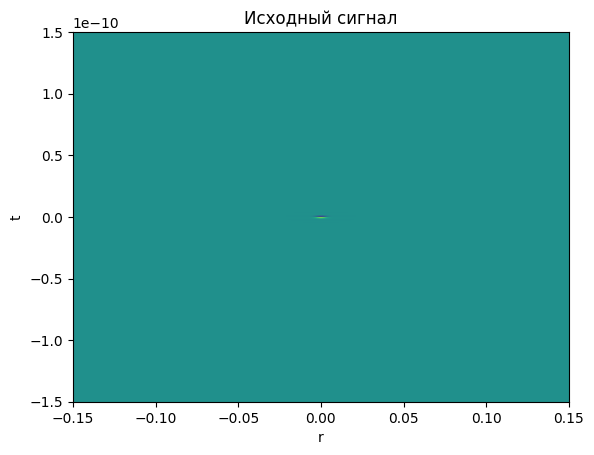

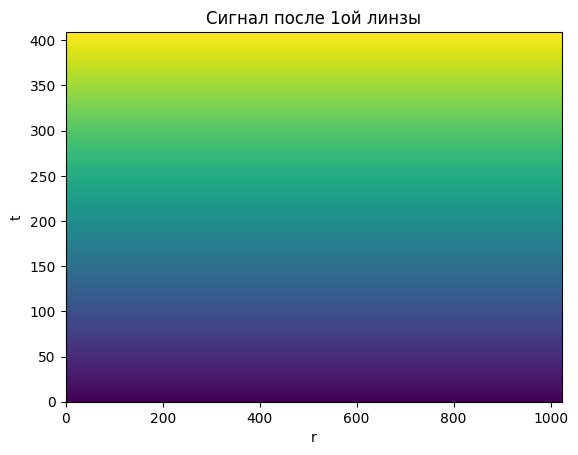

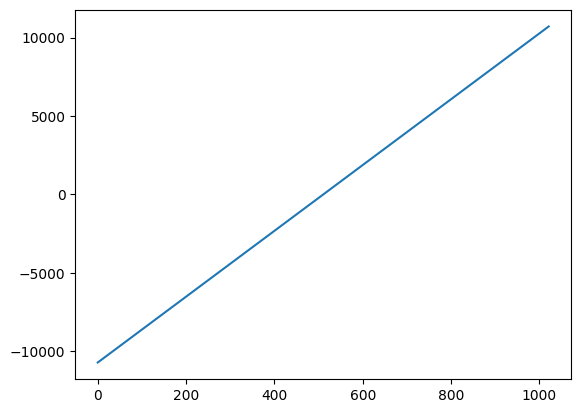

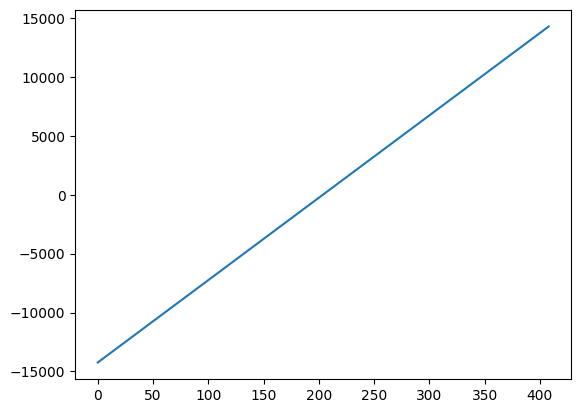

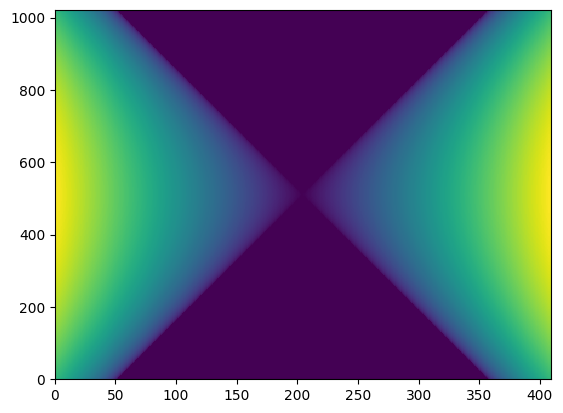

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters and physical constants
I0 = 1.*10**8  # Intensity at focus, W/m^2
lambda0 = 0.7*10**(-3)  # wavelength, m
c = 3.*10**8  # speed of light, m/s
T0 = lambda0 / c
tau0 = 5.*T0/10  # pulse duration, s
eps0 = 8.85*10**-12  # dielectric permittivity, F/m

# Grid parameters
T_win = 3*10**-10  # time window, s
N_time = int(16384/40)  # number of time points
dT = T_win / (N_time-1)  # time step
t = np.linspace(-T_win/2, T_win/2, N_time)  # time coordinate, s
R = 0.3  # Spatial window, m
D = 0.005  # beam diameter, m
r0 = D
M_space = 1023  # number of spatial points
dr = R / (M_space-1)  # spatial step
r = np.linspace(-R/2, R/2, M_space)  # beam coordinate in aperture, m

# Calculated signal parameters
f0 = c / lambda0  # central frequency
omega0 = 2*np.pi*f0  # cyclic frequency
df = 1 / T_win
f = np.linspace(-(N_time-1)*df/2, (N_time)*df/2, N_time)

# f = np.fft.fftfreq(N_time, 1/((N_time)*df))
omega = 2*np.pi*f
f_r = np.linspace(-(M_space-1)/2, (M_space-1)/2, M_space-1) / R

# f_r = np.fft.fftfreq(M_space, R/M_space)

# Medium parameters #1 (air)
N0_air = 1
a_air = 1.0959*10**(-45)  # dispersion coefficient, s^3/m
b_air = 0
n2_air = 0  # nonlinear refractive index, m^2/W
g_air = omega0 * n2_air / c

# Define and normalize the pulse
E0 = np.sqrt(I0)
e_r = np.exp(-2.*(r/r0)**2)  # spatial part of the pulse
e_tau = np.exp(-2.*(t/tau0)**2)  # temporal part of the pulse
E_input = E0 * np.outer(e_tau * np.sin(omega0*t), e_r)  # defined pulse (space-time)

# Plot the original signal
plt.figure()
plt.imshow(E_input, extent=(r.min(), r.max(), t.min(), t.max()), aspect='auto')
plt.ylabel('t')
plt.xlabel('r')
plt.title('Исходный сигнал')

# Propagation parameters
F = 0.254  # focal length

# Curvature - curving the pulse in the time spectrum area
G_r = np.fft.fft(E_input, axis=0)  # 1st Fourier => get the normal spectrum to curve the pulse
e_sph = np.fft.fftshift(np.exp(-1j*omega[:, None]*(r**2)/(F*2*c)), axes=0)  # curvature multiplier
G_sph = G_r * e_sph  # curved spectrum
G_sph_space = np.fft.fft(G_sph, axis=1)  # 2nd Fourier => get the spectrum through spatial frequencies to propagate the pulse
E_sph = np.fft.ifft(G_sph, axis=0)

# Plot the signal after the 1st lens
plt.figure()
plt.imshow(np.abs(E_sph), extent=(r.min(), r.max(), t.min(), t.max()), aspect='auto')
plt.ylabel('t')
plt.xlabel('r')
plt.title('Сигнал после 1ой линзы')

# Propagation in air BEFORE the crystal
temp = 50
h_air1 = F / temp
G_space_air1_next = G_sph_space

# 1) Dispersion
n_air = N0_air + c*a_air*(f*2*np.pi)**2
k_air = omega / c
k_2D_air = np.tile(k_air, (len(r), 1)).T
plt.pcolormesh(k_2D_air)
plt.show()
# 2) Diffraction
k_r = (2*np.pi*f_r)
plt.plot(k_r)
plt.show()

plt.plot(k_air)
plt.show()

k_r_2D = np.tile(k_r[:, None], (1, len(r))).T
plt.pcolormesh(np.sqrt(np.asarray([k_air])**2 - np.asarray([k_r]).T**2, where=(np.asarray([k_air])**2 - np.asarray([k_r]).T**2 >= 0)))
plt.show()
# # k, accounting for dispersion and diffraction effects for the propagator
# k_z_air = np.zeros((len(t), len(r)-1))
# for i in range(N_time):
#     for j in range(M_space-1):
#         if (k_2D_air[i, j]**2 - k_r_2D[i, j]**2) >= 0:
#             k_z_air[i, j] = np.sqrt(k_2D_air[i, j]**2 - k_r_2D[i, j]**2)
#         else:
#             k_z_air[i, j] = 0
# plt.pcolormesh(k_z_air)
# plt.show()
# # Propagation multiplier for dispersion and diffraction
# H_dd_air1 = np.fft.fftshift(np.exp(-1j*k_z_air*h_air1))
# for counter in range(temp):
#     G_prop_dd_air1 = G_space_air1_next[:, :1022] * H_dd_air1
#     E_prop_dd_air1 = np.fft.ifft2(G_prop_dd_air1)
#     G_space_air1_next = np.fft.fft2(E_prop_dd_air1)

# G_output_air1 = G_space_air1_next
# E_output_air1 = np.fft.ifft2(G_output_air1)

# # Plot the signal after propagation from the 1st lens
# plt.figure()
# plt.imshow(k_z_air, extent=(r.min(), r.max(), t.min(), t.max()), aspect='auto')
# plt.ylabel('t')
# plt.xlabel('r')
# plt.title('Сигнал после распространения на F от 1ой линзы')

# plt.figure()
# plt.imshow(abs(E_output_air1), extent=(r.min(), r.max(), t.min(), t.max()), aspect='auto')
# plt.ylabel('t')
# plt.xlabel('r')
# plt.title('Сигнал после распространения на F от 1ой линзы')


# OriginSp = np.abs(np.fft.fftshift(np.fft.fft(E_input, axis=0), axes=0))
# X00 = OriginSp[:, 512]
# SpSpectrum = np.abs(np.fft.fftshift(np.fft.fft(E_output_air1, axis=0), axes=0))
# X0 = SpSpectrum[:, 512]
# X1 = SpSpectrum[:, 584]

# # Plot the spectrum
# plt.figure()
# # plt.hold(True)
# plt.plot(f, X00 / np.max(X00), 'k')
# plt.plot(f, X0 / np.max(X0))
# plt.plot(f, X1 / np.max(X1))
# plt.xlim([0*10**(14), 0.05*10**(14)])
# plt.legend(['quasi-point source spectrum', 'x0 = 0 мм', 'x1 = 20 мм'])
# plt.show()




In [54]:
import numpy as np
# Пример использования
arr = np.array([1, 4, 9, -4, -9])



print(np.sqrt(arr, where=(arr >= 0)))


TypeError: ufunc 'sqrt' output (typecode 'd') could not be coerced to provided output parameter (typecode 'l') according to the casting rule ''same_kind''

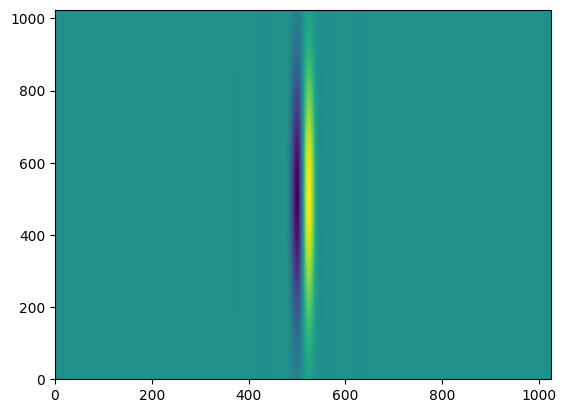

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fft import fft, ifft



from numpy import ma
from matplotlib import ticker, cm

# Параметры пучка
wavelength = 780e-9
E0 = 1
c = 3e+8
dt = 7.5e-15
dx = 10 * wavelength


TAU = 6.5e-15 / 5
XTAU = wavelength * 40

omega0 = 2 * np.pi * c / wavelength
dots = 2 ** 10

t_ = np.linspace(-20e-15, 20e-15, dots)
x_ = np.linspace(-4 * dx, 4 * dx, dots)

DX = x_[1] - x_[2]
T, X = np.meshgrid(t_, x_, sparse=True)
E_x = E0 * np.exp(-2 * (X / XTAU) ** 2) * np.exp(-2 * (T / TAU) ** 2) * np.sin(omega0 * T)


#######################################
#### Спектры времени/ пространства ####
#######################################

E_x_spec_x = np.fft.fftshift(np.fft.fft(E_x, axis=0), axes=0)
E_x_spec_t = np.fft.fft(E_x, axis=1)
E_x_spec_xt = np.fft.fft2(E_x)

plt.pcolormesh(E_x)
plt.show()
##### Фокус
F = 3.75e-3


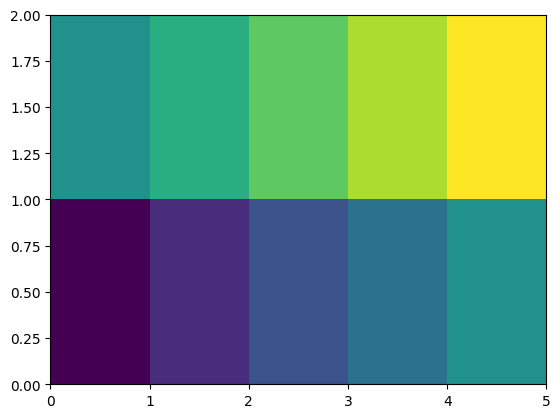

In [78]:
nx, ny = (5, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y, indexing = "xy")
plt.pcolormesh(xv+yv)
plt.show()

C:\Users\MSI User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == "__main__":


(1024, 1024)


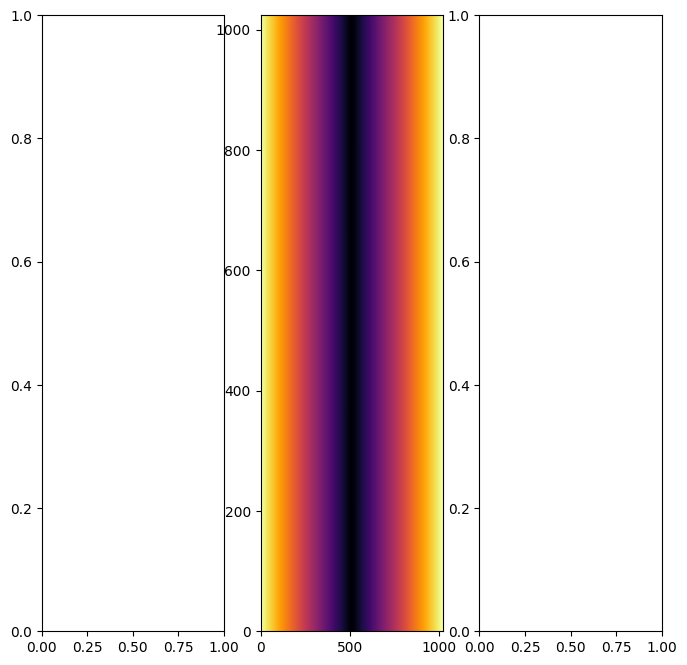

In [63]:

def k():
    # kx = 2 * np.pi * np.fft.fftfreq(dots, DX)/c
    kx = np.asarray([np.fft.fftshift(np.fft.fftfreq(dots))/(x_[1]-x_[2])/c])[::-1] #* 2 * np.pi
    # print(kx.T)
    # kx, kx = np.meshgrid(kx, kx)
    k_n = np.asarray([np.fft.fftshift(np.fft.fftfreq(dots))/(t_[1]-t_[2])/c * 2 * np.pi])[::-1]
    # k_n, k_n = np.meshgrid(k_, k_)
    # print(kx.max())# * n_w(w_)
    kz = np.sqrt(k_n ** 2 - kx.T ** 2)

    return kx, kz, k_n

kx, kz, k_ = k()
print(kz.shape)
fig, axes = plt.subplots(1, 3, figsize=(8,8))
# ax = axes[0]
# ax.plot(kx)
ax = axes[1]
ax.pcolormesh(kz, cmap='inferno')
# ax = axes[2]
# ax.pcolormesh(k_, cmap='inferno')
plt.show()


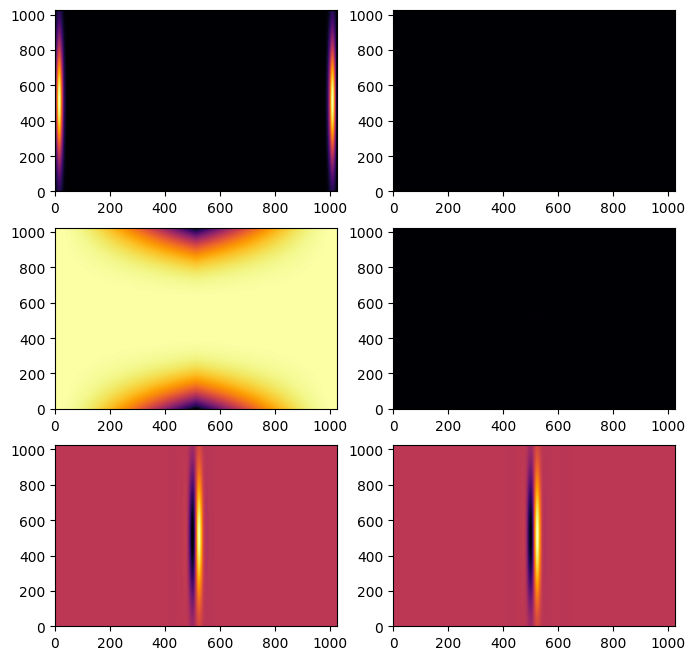

In [64]:
# kx, kz, k_ = k()
# kv, xv = np.meshgrid(k_, x_)
def linza(x, k_):
    return np.exp(-(1j * k_ / (2 * F)) * x ** 2)
########## Расчет прохождения пучка через линзу ##########
# E_x_lens = np.fft.fftshift(E_x_spec_t, axes = 1) * linza(xv, kv)
E_x_lens = np.fft.fftshift(linza(x_, k_.T), axes = 0).T* E_x_spec_t
E_x_lens = np.fft.ifft(E_x_lens, axis = 1)


#######################################
############### ГРАФИКИ ###############
#######################################

fig, axes = plt.subplots(3, 2, figsize=(8,8))

## Первая колонка ###
ax = axes[0,0]
ax.pcolormesh(abs(E_x_spec_t), cmap='inferno')

ax = axes[1,0]
ax.pcolormesh(np.fft.fftshift(linza(x_, k_.T), axes = 0).T.real, cmap='inferno')

ax = axes[2,0]
ax.pcolormesh(E_x_lens.real, cmap='inferno')

### Вторая Колонка ###
ax = axes[0,1]
ax.pcolormesh(abs(E_x_spec_x), cmap='inferno')

ax = axes[1,1]
ax.pcolormesh(abs(np.fft.fftshift(E_x_spec_xt)), cmap='inferno')


ax = axes[2,1]
ax.pcolormesh(E_x.real, cmap='inferno')

plt.show()

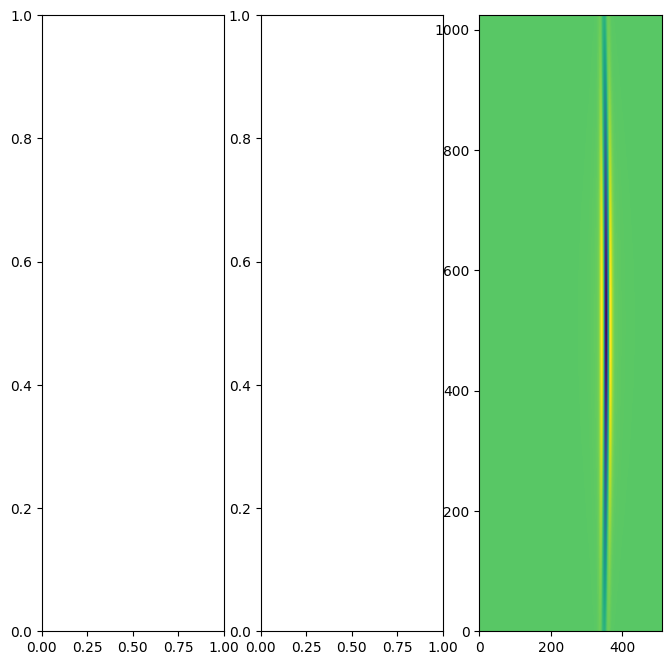

In [25]:

def C_():
    return np.fft.fft2(E_x_lens)[:,dots//2+1:]

def g_x(z):
    # kx, kz, k_ = k()
    g = C_() * np.exp(-1j * kz[:,dots//2+1:] * z)
    return np.fft.ifft2(g).real

def g_z(z):
    kx, kz, k_ = k()
    g = (kx[dots//2+1:] * C_() * np.exp(-1j * kz[:,dots//2+1:] * z)/kz[:,dots//2+1:])
    return np.fft.ifft2(g).real

fig, axes = plt.subplots(1, 3, figsize=(8,8))
# ax = axes[0]
# ax.plot(kx)
# ax = axes[1]
# ax.pcolormesh(kz, cmap='inferno')
ax = axes[2]
ax.pcolormesh(g_x(F).real)
plt.show()


In [ ]:
import numpy as np

class Sheet():
    def __init__(self,extent_x, extent_y, Nx, Ny):

        self.dx = extent_x/Nx
        self.dy = extent_y/Ny

        self.x = self.dx*(np.arange(Nx)-Nx//2)
        self.y = self.dy*(np.arange(Ny)-Ny//2)
        self.xx, self.yy = np.meshgrid(self.x, self.y)

        self.Nx = int(Nx)
        self.Ny = int(Ny)
        self.E = np.zeros((self.Ny, self.Nx))



    def rectangular_slit(self,x0, y0, lx, ly):
        """
        Creates a slit centered at the point (x0, y0) with width lx and height ly
        """
        self.E += np.select( [((self.xx > (x0 - lx/2) ) & (self.xx < (x0 + lx/2) )) & ((self.yy > (y0 - ly/2) ) & (self.yy < (y0 + ly/2) )),  True], [1, 0])